In [33]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import *

# Nitrates

In [70]:
outputpath = '/scratch/usr/hbkoziel/Arc12/pybins/'

outfile = outputpath+'BSO_DIN.npy'
DATA = np.load(outfile, allow_pickle=True, fix_imports=True)

outfile = outputpath+'BSOdepth.npy'
depth = np.load(outfile, allow_pickle=True, fix_imports=True)

outfile = outputpath+'BSOlonlat.npy'
lonlat = np.load(outfile, allow_pickle=True, fix_imports=True)

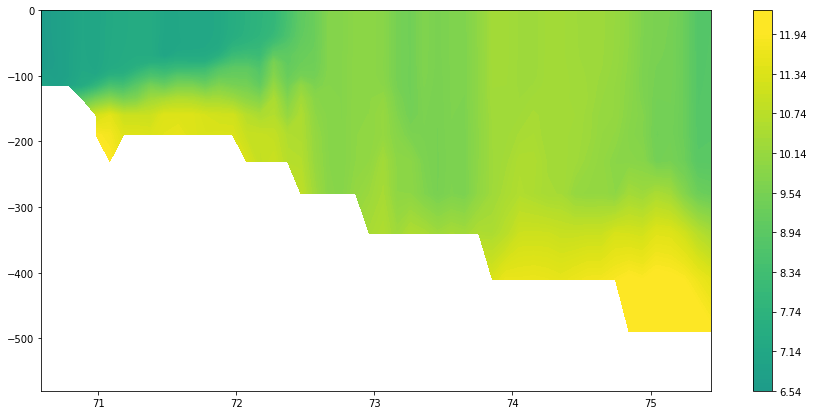

In [71]:
fig, ax = plt.subplots(1,1, figsize=(15,7), facecolor='w', edgecolor='k')
p = ax.contourf(lonlat[10:60,1],depth[:21],DATA[:,10:60,0],100,vmin=0,vmax=12)
fig.colorbar(p, ax=ax)

In [72]:
print DATA.shape
print lonlat[:80,1].shape
print depth[:21].shape

(21, 80, 432)
(80,)
(21,)


In [73]:
depth[:21]

array([   0.,  -10.,  -20.,  -30.,  -40.,  -50.,  -60.,  -70.,  -80.,
        -90., -100., -115., -135., -160., -190., -230., -280., -340.,
       -410., -490., -580.])

In [74]:
DATA[:,:,1]

array([[6.20741653, 5.79261971, 6.65661907, ..., 4.19616318, 3.99737573,
        4.01800728],
       [6.20735216, 5.79261541, 6.65647507, ..., 4.18686199, 3.99841022,
        4.01967382],
       [6.20679092, 5.7920475 , 6.65745687, ..., 4.17340279, 3.9999578 ,
        4.02067423],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

In [75]:
DATA_50_500m = np.nanmean(np.nanmean(DATA[5:21,10:60,:],axis=1),axis=0)
DATA_0_50m = np.nanmean(np.nanmean(DATA[0:5,10:60,:],axis=1),axis=0)
DATA_alldepth = np.nanmean(np.nanmean(DATA[:,10:60,:],axis=1),axis=0)

/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


In [76]:
base = datetime.datetime(1980, 1, 1)
date = np.array([base +relativedelta(months=+i) for i in xrange(432)])

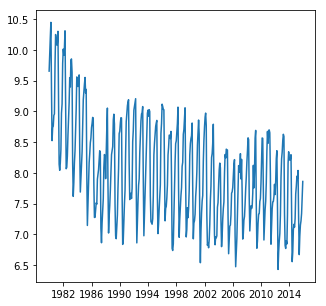

In [77]:
fig = plt.figure(figsize=(5,5), facecolor='w', edgecolor='k')
plt.plot(date,DATA_alldepth)

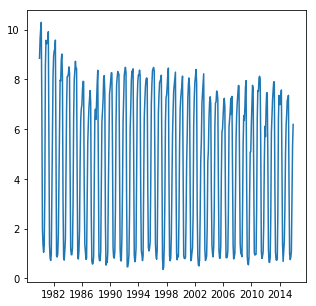

In [78]:
fig = plt.figure(figsize=(5,5), facecolor='w', edgecolor='k')
plt.plot(date,DATA_0_50m)

(432,)


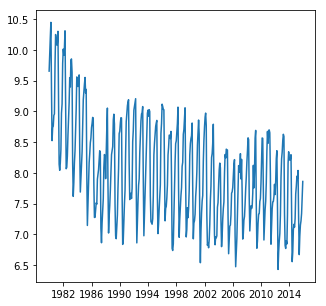

In [79]:
fig = plt.figure(figsize=(5,5), facecolor='w', edgecolor='k')
plt.plot(date,DATA_alldepth)
print DATA_0_50m.shape

In [80]:
import pandas as pd
data = np.array([DATA_0_50m,DATA_50_500m,DATA_alldepth])
print data.shape
data = np.transpose(data)
print data.shape

(3, 432)
(432, 3)


In [81]:
df = pd.DataFrame(data=data, index=date, columns=["DIN_0_50m", "DIN_50_500m", "DIN_ALL_DEPTHS"])
df.index.name='time'

In [82]:
df.head()

,DIN_0_50m,DIN_50_500m,DIN_ALL_DEPTHS
time,,,
1980-01-01,8.845323,9.925855,9.655722
1980-02-01,9.614650,10.076662,9.961159
1980-03-01,10.010266,10.260735,10.198118
1980-04-01,10.288135,10.503408,10.449590
1980-05-01,6.770838,10.262804,9.389813


In [83]:
df.to_csv('/home/hbkoziel/pyfesom/data/BSO_nuts/BSO_DIN_model.csv', index=True)

In [84]:
df2 = pd.read_csv('/home/hbkoziel/pyfesom/data/BSO_nuts/BSO_DIN_model.csv', header=0, sep = ',',na_values=[''], decimal=".", index_col='time', parse_dates=True)
df2.head()

,DIN_0_50m,DIN_50_500m,DIN_ALL_DEPTHS
time,,,
1980-01-01,8.845323,9.925855,9.655722
1980-02-01,9.614650,10.076662,9.961159
1980-03-01,10.010266,10.260735,10.198118
1980-04-01,10.288135,10.503408,10.449590
1980-05-01,6.770838,10.262804,9.389813


# Silicates

In [90]:
outfile = outputpath+'BSO_DSI.npy'
DATA = np.load(outfile, allow_pickle=True, fix_imports=True)
DATA_50_500m = np.nanmean(np.nanmean(DATA[5:21,10:60,:],axis=1),axis=0)
DATA_0_50m = np.nanmean(np.nanmean(DATA[0:5,10:60,:],axis=1),axis=0)
DATA_alldepth = np.nanmean(np.nanmean(DATA[:,10:60,:],axis=1),axis=0)
data = np.array([DATA_0_50m,DATA_50_500m,DATA_alldepth])
print(np.shape(data))
base = datetime.datetime(1980, 1, 1)
date = np.array([base +relativedelta(months=+i) for i in xrange(432)])
df = pd.DataFrame(data=data.T, index=date, columns=["DSI_0_50m", "DSI_50_500m", "DSI_ALL_DEPTHS"])
df.index.name='time'
df.to_csv('/home/hbkoziel/pyfesom/data/BSO_nuts/BSO_DSI_model.csv', index=True)

(3, 432)


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


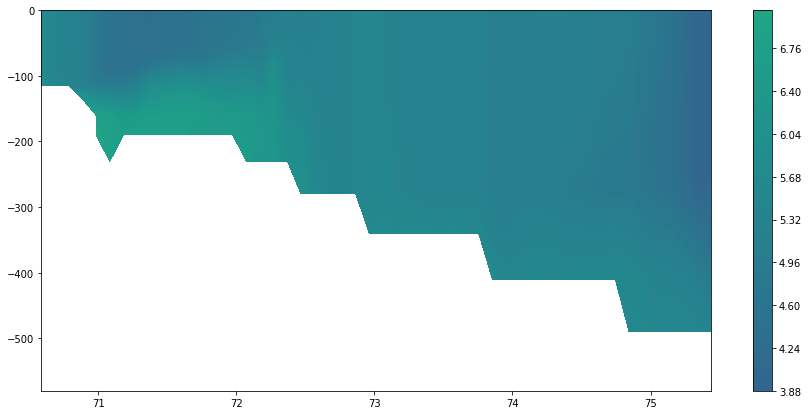

In [86]:
fig, ax = plt.subplots(1,1, figsize=(15,7), facecolor='w', edgecolor='k')
p = ax.contourf(lonlat[10:60,1],depth[:21],DATA[:,10:60,0],100,vmin=0,vmax=12)
fig.colorbar(p, ax=ax)

In [91]:
df.head()

,DSI_0_50m,DSI_50_500m,DSI_ALL_DEPTHS
time,,,
1980-01-01,4.966287,5.246417,5.176385
1980-02-01,5.168779,5.242611,5.224153
1980-03-01,5.267277,5.281955,5.278285
1980-04-01,5.359302,5.408779,5.396409
1980-05-01,3.262100,5.239344,4.745033
